In [5]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/preprocessed_20221106.csv', index_col = 0)

In [3]:
df

,Survived,Pclass,SibSp,Parch,Age_true,AgeGroup,FareGroup,CabinLvl,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Mr,Title_Mrs,Title_Ms,Title_Noble
0,0,3,1,0,1,2,0,0,0,0,1,0,1,0,0,0
1,1,1,1,0,1,4,4,5,1,0,0,0,0,1,0,0
2,1,3,0,0,1,3,1,0,0,0,1,0,0,0,1,0
3,1,1,1,0,1,4,4,5,0,0,1,0,0,1,0,0
4,0,3,0,0,1,4,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,1,3,2,0,0,0,1,0,0,0,0,1
887,1,1,0,0,1,2,3,6,0,0,1,0,0,0,1,0
888,0,3,1,2,0,2,3,0,0,0,1,0,0,0,1,0
889,1,1,0,0,1,3,3,5,1,0,0,0,1,0,0,0


In [6]:
X, y = df.iloc[:, 1:], df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [7]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

parameters = {
    'C': (0.1, 0.5, 1, 5),
    'kernel': ('rbf', 'linear'),
    'gamma': (0.1, 1, 5)
}

clf = SVC()
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search_estimator = GridSearchCV(clf, parameters, scoring='f1', cv=stratified_10_fold_cv, return_train_score=False,
                                    verbose = 2)
grid_search_estimator.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1,

[CV] END .........................C=0.5, gamma=5, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=5, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=5, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=5, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=5, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=5, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.5, gamma=5, kernel=linear; total time=   0.0s
[CV] END ......................C=0.5, gamma=5, kernel=linear; total time=   0.0s
[CV] END ......................C=0.5, gamma=5, kernel=linear; total time=   0.0s
[CV] END ......................C=0.5, gamma=5, kernel=linear; total time=   0.0s
[CV] END ......................C=0.5, gamma=5, kernel=linear; total time=   0.0s
[CV] END ......................C=0.5, gamma=5, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END ........................C=5, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=5, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=5, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=5, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=5, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=5, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=5, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=5, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=5, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=5, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=5, gamma=5, kernel=rbf; total time=   0.0s
[CV] END ...........................C=5, gamma=5, kernel=rbf; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': (0.1, 0.5, 1, 5), 'gamma': (0.1, 1, 5),
                         'kernel': ('rbf', 'linear')},
             scoring='f1', verbose=2)

In [8]:
results = pd.DataFrame(grid_search_estimator.cv_results_)
print("best score is {} with params {}".format(grid_search_estimator.best_score_, grid_search_estimator.best_params_))
display(results)
estimator = grid_search_estimator.best_estimator_

best score is 0.7645954374154613 with params {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020549,0.006791,0.003822,0.005249,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.600000,0.731707,...,0.682927,0.540541,0.352941,0.444444,0.540541,0.571429,0.714286,0.579420,0.112432,19
1,0.010932,0.003382,0.002790,0.001764,0.1,0.1,linear,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",0.734694,0.840000,...,0.857143,0.750000,0.800000,0.711111,0.636364,0.545455,0.727273,0.737477,0.088342,15
2,0.019158,0.006060,0.006092,0.002200,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23
3,0.009077,0.006452,0.002564,0.004524,0.1,1,linear,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}",0.734694,0.840000,...,0.857143,0.750000,0.800000,0.711111,0.636364,0.545455,0.727273,0.737477,0.088342,15
4,0.017583,0.003294,0.006985,0.005761,0.1,5,rbf,"{'C': 0.1, 'gamma': 5, 'kernel': 'rbf'}",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23
5,0.008365,0.007503,0.003957,0.007314,0.1,5,linear,"{'C': 0.1, 'gamma': 5, 'kernel': 'linear'}",0.734694,0.840000,...,0.857143,0.750000,0.800000,0.711111,0.636364,0.545455,0.727273,0.737477,0.088342,15
6,0.012349,0.006636,0.007011,0.006938,0.5,0.1,rbf,"{'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}",0.775510,0.823529,...,0.888889,0.765957,0.750000,0.755556,0.697674,0.600000,0.714286,0.754413,0.072435,3
7,0.013671,0.006930,0.003800,0.002882,0.5,0.1,linear,"{'C': 0.5, 'gamma': 0.1, 'kernel': 'linear'}",0.765957,0.840000,...,0.829268,0.723404,0.818182,0.727273,0.622222,0.558140,0.744186,0.743816,0.087660,6
8,0.012499,0.006250,0.004689,0.007163,0.5,1,rbf,"{'C': 0.5, 'gamma': 1, 'kernel': 'rbf'}",0.700000,0.731707,...,0.628571,0.682927,0.648649,0.769231,0.588235,0.476190,0.628571,0.653829,0.077746,18
9,0.011578,0.008650,0.003426,0.006166,0.5,1,linear,"{'C': 0.5, 'gamma': 1, 'kernel': 'linear'}",0.765957,0.840000,...,0.829268,0.723404,0.818182,0.727273,0.622222,0.558140,0.744186,0.743816,0.087660,6


acc=0.8022388059701493


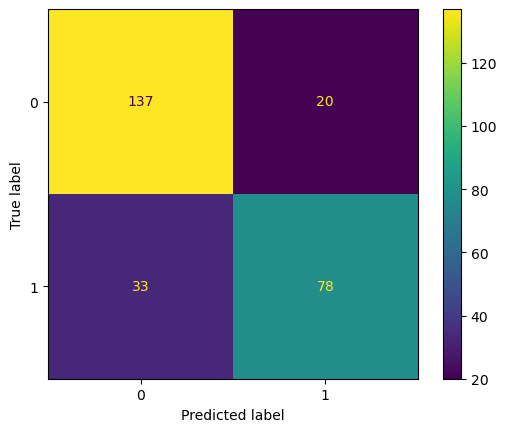

In [9]:
predictions = estimator.predict(X_test)

cm = confusion_matrix(y_test, predictions)
acc = accuracy_score(y_test, predictions)
print(f'{acc=}')
ConfusionMatrixDisplay(cm).plot()

In [10]:
for feature in X_test.columns:
    print(feature)
    for value in X_test[feature].unique():
        indices = X_test[feature] == value
        true_feature = y_test[indices]
        pred_feature = predictions[indices]
        print(' -', value, ': true = ', sum(true_feature), '\tpred = ', sum(pred_feature))

Pclass
 - 3 : true =  34 	pred =  24
 - 2 : true =  24 	pred =  30
 - 1 : true =  53 	pred =  44
SibSp
 - 1 : true =  39 	pred =  40
 - 0 : true =  68 	pred =  55
 - 2 : true =  4 	pred =  3
 - 3 : true =  0 	pred =  0
 - 4 : true =  0 	pred =  0
Parch
 - 1 : true =  18 	pred =  23
 - 0 : true =  78 	pred =  61
 - 2 : true =  14 	pred =  14
 - 3 : true =  0 	pred =  0
 - 4 : true =  0 	pred =  0
 - 5 : true =  1 	pred =  0
Age_true
 - 0 : true =  20 	pred =  18
 - 1 : true =  91 	pred =  80
AgeGroup
 - 0 : true =  11 	pred =  10
 - 3 : true =  27 	pred =  16
 - 2 : true =  26 	pred =  24
 - 1 : true =  7 	pred =  7
 - 4 : true =  30 	pred =  30
 - 5 : true =  10 	pred =  11
FareGroup
 - 2 : true =  18 	pred =  23
 - 1 : true =  14 	pred =  7
 - 3 : true =  32 	pred =  26
 - 4 : true =  24 	pred =  22
 - 0 : true =  9 	pred =  6
 - 5 : true =  14 	pred =  14
CabinLvl
 - 0 : true =  65 	pred =  54
 - 4 : true =  12 	pred =  12
 - 5 : true =  12 	pred =  7
 - 7 : true =  3 	pred =  1
 - 6